In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16614, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 16614 (delta 51), reused 58 (delta 27), pack-reused 16522
Receiving objects: 100% (16614/16614), 15.09 MiB | 11.46 MiB/s, done.
Resolving deltas: 100% (11410/11410), done.


In [ ]:
%cd yolov5
!python -m pip install -r requirements.txt

/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.0/757.0 kB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="CmVy8mKymH697jI1WrCS")
project = rf.workspace("codev").project("codev")
dataset = project.version(3).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.7
    Uninstalling idna-3.7:
      Successfully uninstalled idna-3.7
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Codev-3 in yolov5pytorch:: 100%|██████████| 8092/8092 [00:01<00:00, 5915.56it/s]


In [ ]:
!python train.py --data Codev-3/data.yaml --hyp data/hyps/hyp.scratch-high.yaml --weights yolov5m.pt \
--epochs 30 --batch-size 32 --optimizer SGD --name train_two --patience 5 --cache

2024-05-18 08:04:25.740690: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 08:04:25.740737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 08:04:25.742146: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=Codev-3/data.yaml, hyp=data/hyps/hyp.scratch-high.yaml, epochs=30, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=Fals

In [ ]:
!python detect.py --weights runs/train/train_two/weights/best.pt --source Codev-3/test/images/ --name inference --exist-ok

detect: weights=['runs/train/train_two/weights/best.pt'], source=Codev-3/test/images/, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=inference, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 20933754 parameters, 0 gradients, 48.1 GFLOPs
image 1/827 /content/yolov5/Codev-3/test/images/000001-6-_png_jpg.rf.51004e755392395df7d7c1f5ccf2fe1e.jpg: 640x640 5 Lentinus edodess, 27.1ms
image 2/827 /content/yolov5/Codev-3/test/images/000001_png_jpg.rf.4d3d767009e83a095c80febb0755d7b4.jpg: 640x640 8 Lentinus edodess, 27.2ms
image 3/827 /content/yolov5/Codev-3

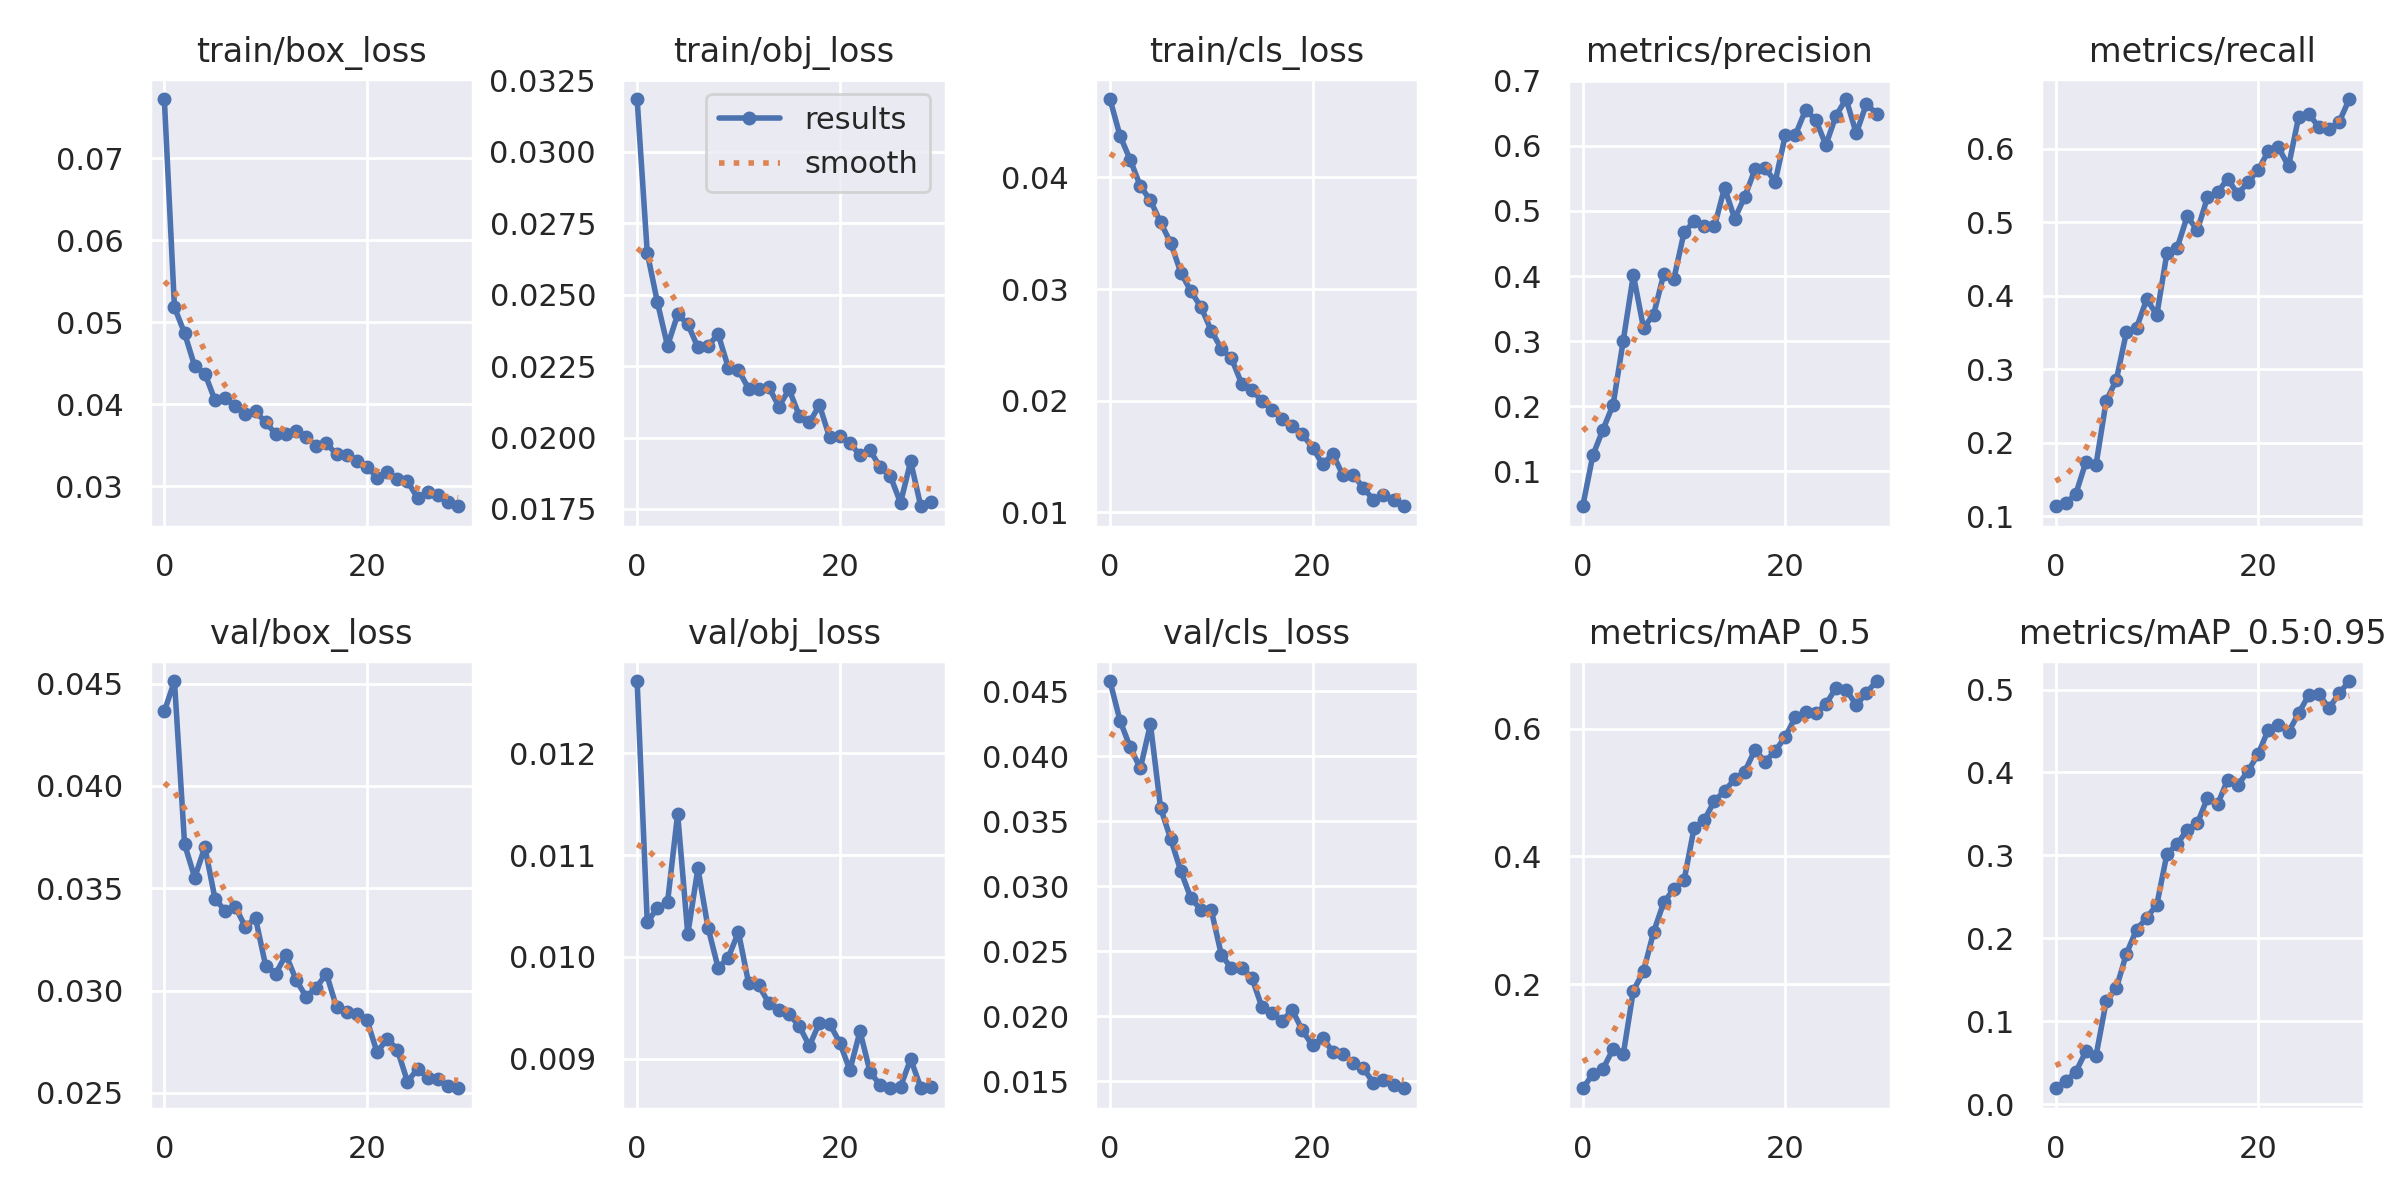

In [ ]:
import glob
from IPython.display import Image, display
display(Image('runs/train/train_two/results.png'))

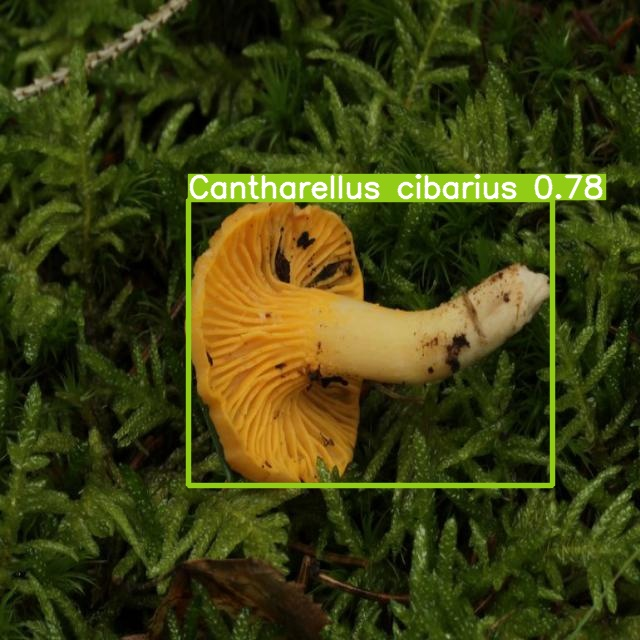

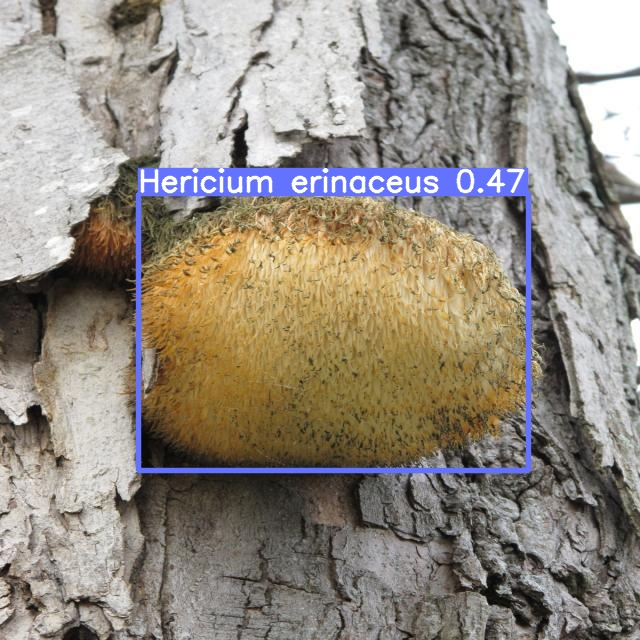

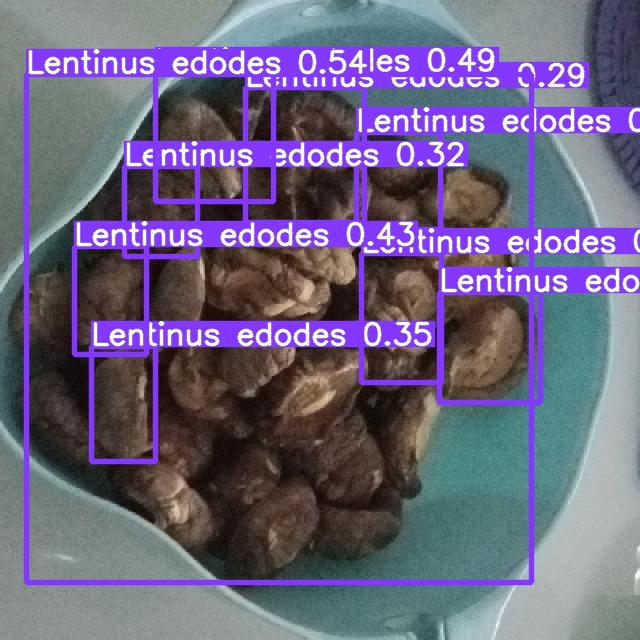

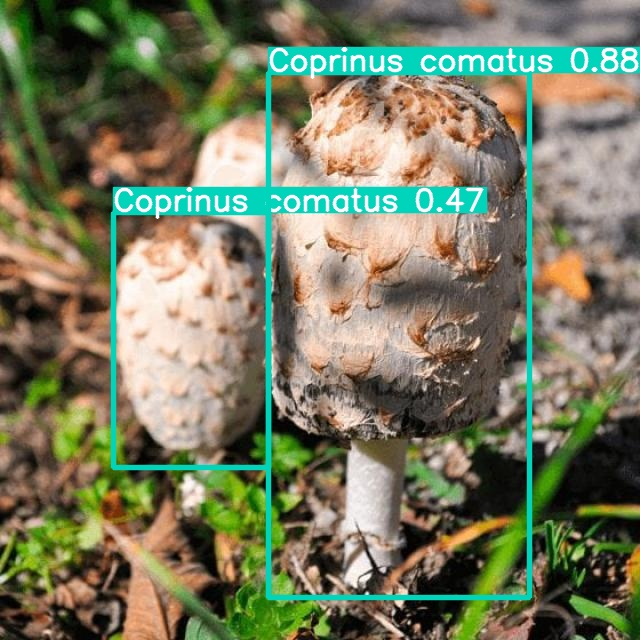

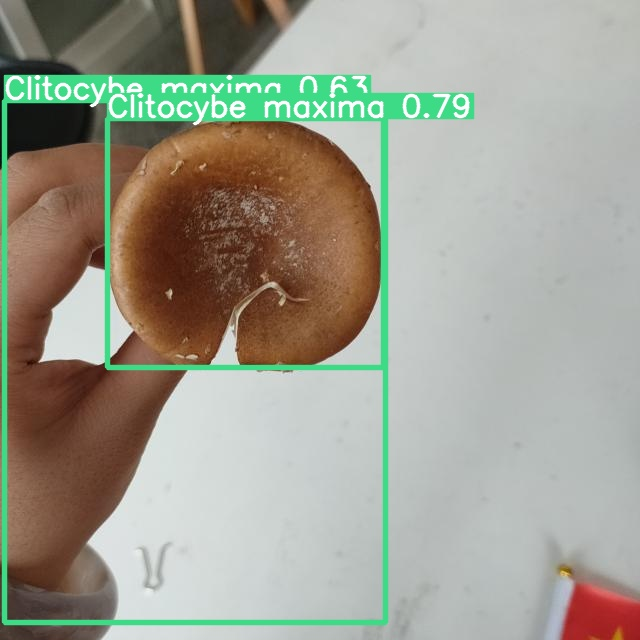

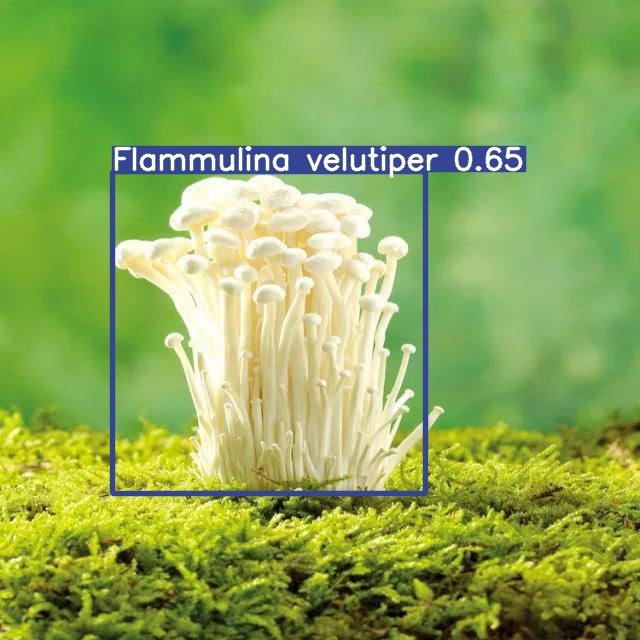

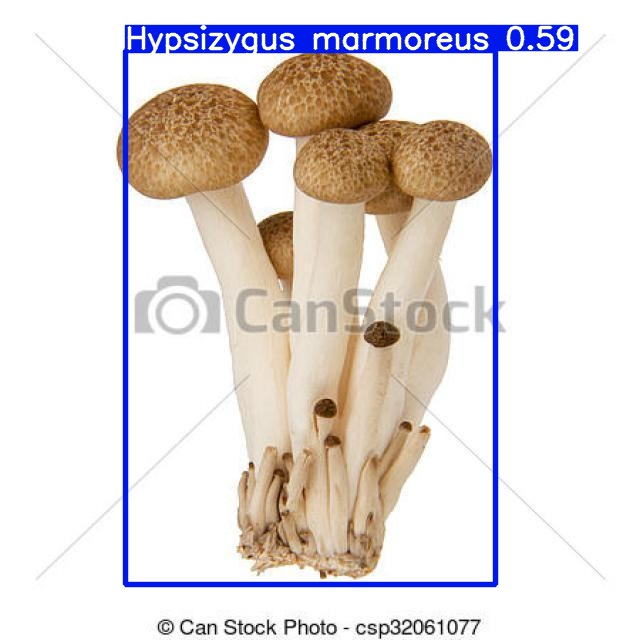

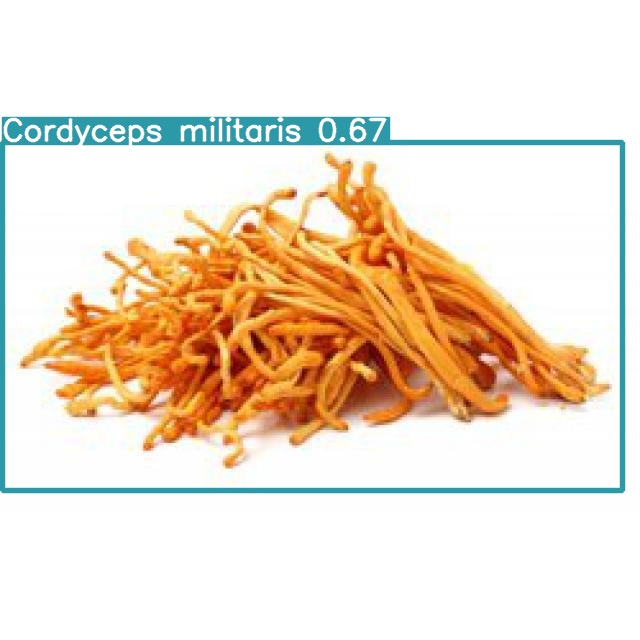

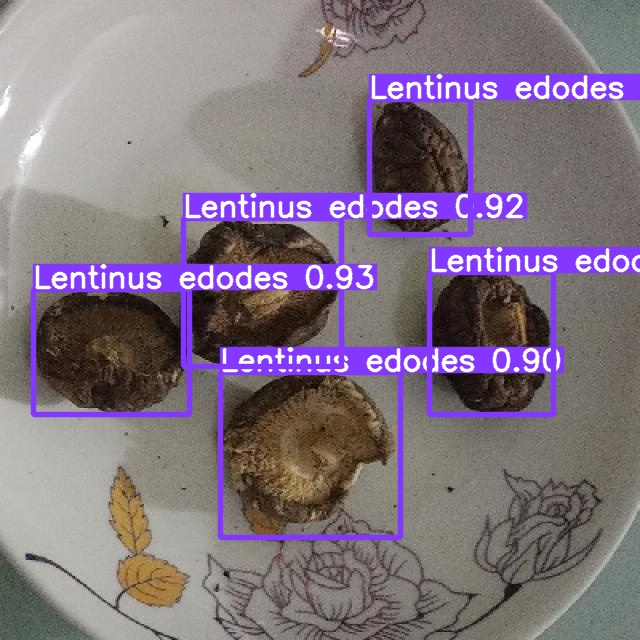

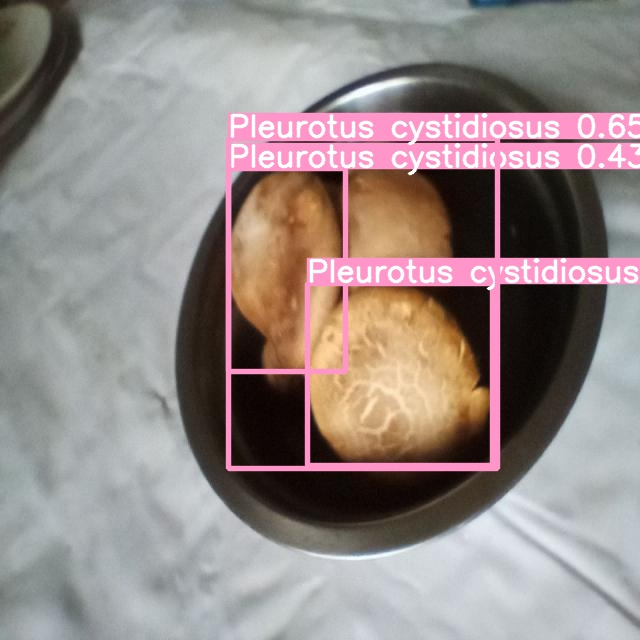

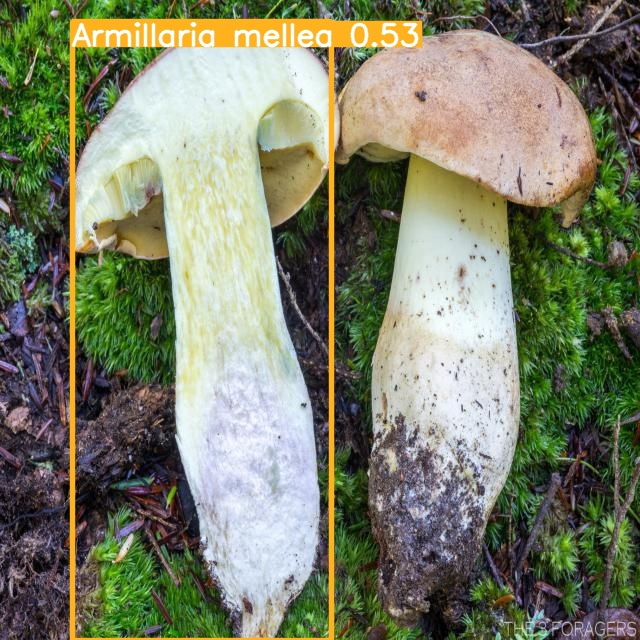

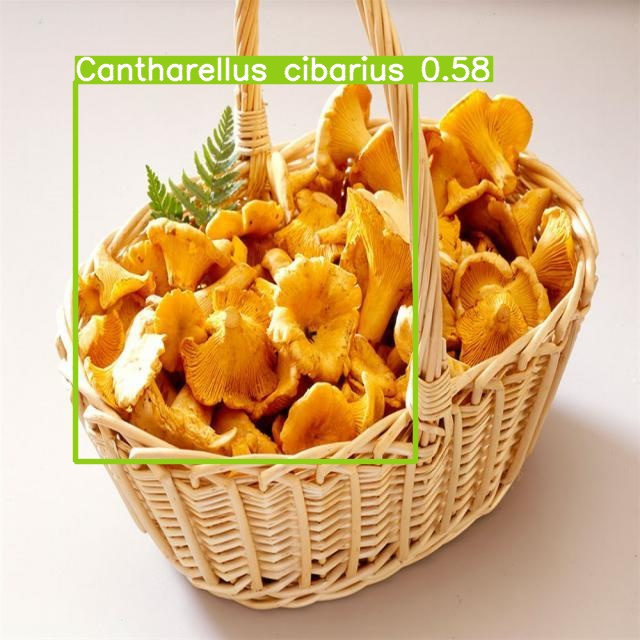

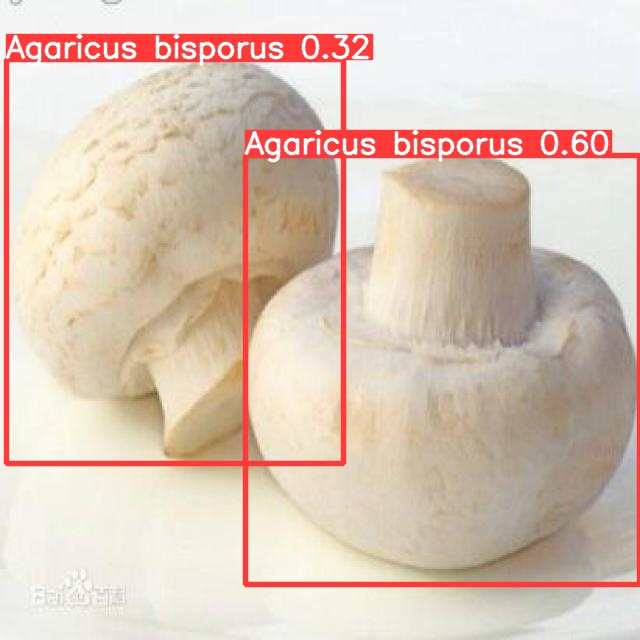

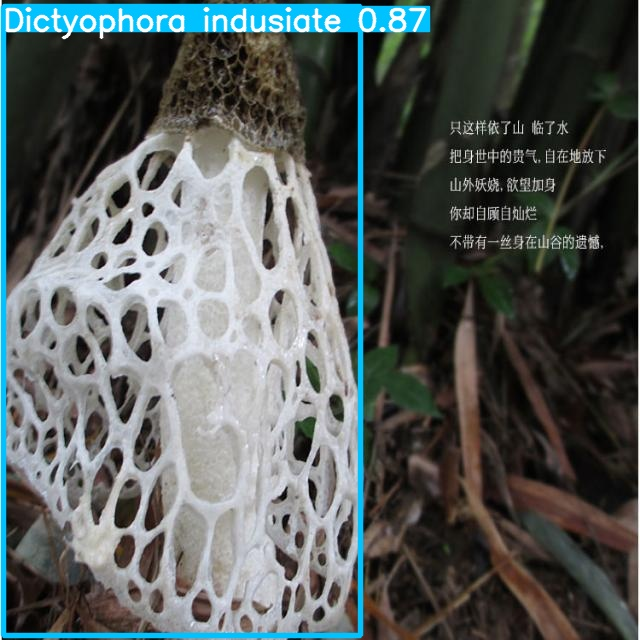

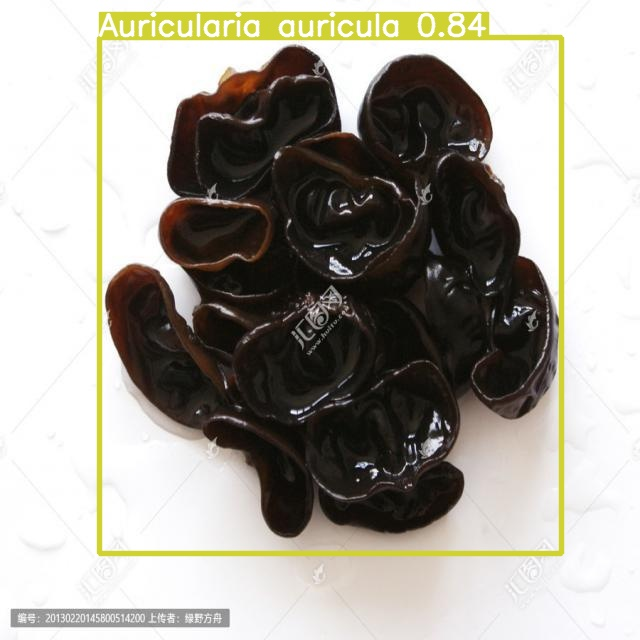

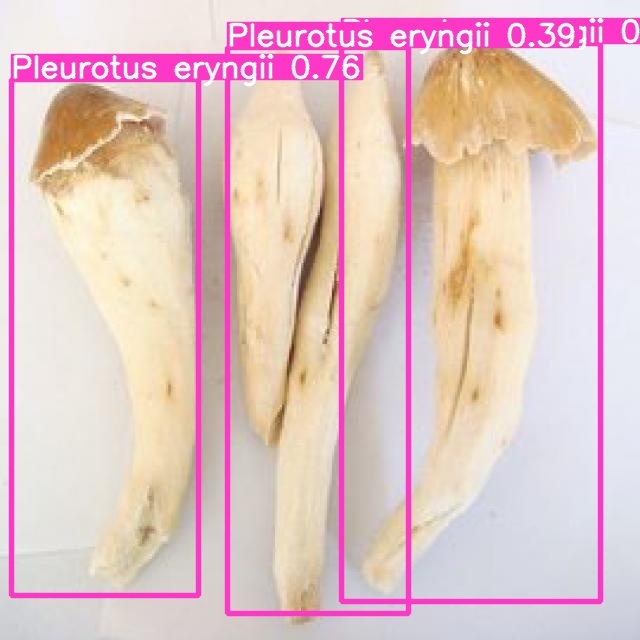

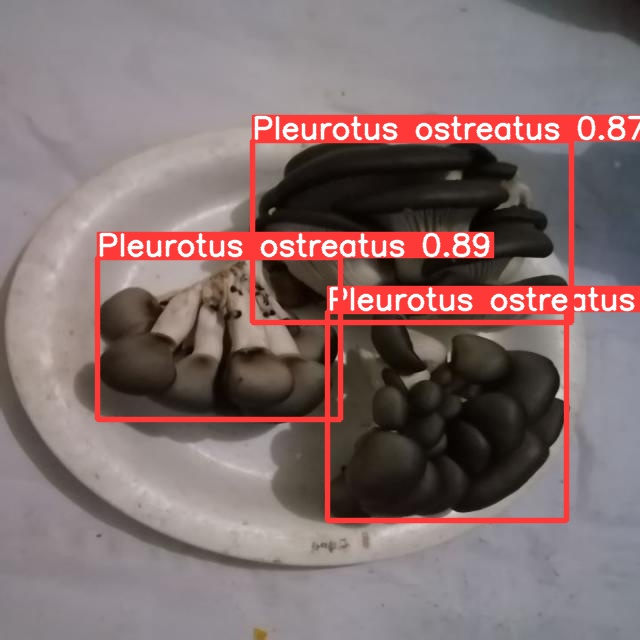

In [ ]:
#display inference on ALL test images
i = 0
for (i, imageName) in enumerate(glob.glob('runs/detect/inference/*.jpg')): #assuming JPG
    if not (i % 50):
        display(Image(filename=imageName))
        print("\n")